In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
class lineage:
    def __init__(self, a, b, p):
        #a and b indicates ancestral material (1) or non-ancestral (0)
        self.a = a
        self.b = b
        self.p = p#0 or 1 population

    def __str__(self):
        return str(self.a)+str(self.b)+str(self.p)

class state:
    def __init__(self, lng):
        self.lng = lng
        self.l = len(lng)
        self.name()
        self.stat()

    def name(self):
        lng_s = []
        for l in self.lng:
            lng_s.append( str(l.a) + str(l.b) + str(l.p) )
        lng_s.sort()
        self.n = ','.join(lng_s)
        
    def stat(self):
        self.num = {'a': 0, 'b': 0}
        self.index = {'a':[-1,-1],'b':[-1,-1]}
        ai, bi = 0, 0
        for i, l in enumerate(self.lng):
            if l.a == 1:
                self.num['a'] += 1
                self.index['a'][ai] = i
                ai += 1
            if l.b == 1:
                self.num['b'] += 1
                self.index['b'][bi] = i
                bi += 1
                
    def __str__(self):
        prstr = self.n + ": " + "num_a = " + str(self.num['a']) + ", " + "num_b = " + str(self.num['b']) + "\n    " + "index_a = " + str(self.index['a'][0:self.num['a']]) + "\n    " + "index_b = " + str(self.index['b'][0:self.num['b']])
        return(prstr)
    
def Coal(st, i, k):
    if i > st.l or k > st.l:
        print("Wrong lineage index.")
    if st.lng[i].p != st.lng[k].p:
        print("Coalescence is impossible.")
    newState = [st.lng[j] for j in range(st.l) if i != j and k != j]
    newState.append(lineage(st.lng[i].a | st.lng[k].a, st.lng[i].b | st.lng[k].b, st.lng[i].p))
    newState = state(newState)
    return newState

def Recomb(st, i):
    newState = [st.lng[j] for j in range(st.l) if i != j]
    newState.append(lineage(1, 0, st.lng[i].p), lineage(0, 1, st.lng[i].p))
    newState = state(newState)
    return newState
    
def Migration(st, i):
    newState = [st.lng[j] for j in range(st.l) if i != j]
    newState.append(lineage(st.lng[i].a, st.lng[i].b, (st.lng[i].p+1)%2))  
    newState = state(newState)
    return newState
    
numStates =[
    [ [1,1,0] ], # добавил два состояния
    [ [1,1,1] ],

    [ [1,1,0],[1,1,0] ],
    [ [1,1,0],[1,1,1] ],
    [ [1,1,1],[1,1,1] ],

    [ [1,0,0],[1,1,0] ],
    [ [1,0,0],[1,1,1] ],
    [ [1,0,1],[1,1,0] ],
    [ [1,0,1],[1,1,1] ],

    [ [0,1,0],[1,1,0] ],
    [ [0,1,0],[1,1,1] ],
    [ [0,1,1],[1,1,0] ],
    [ [0,1,1],[1,1,1] ],

    [ [0,1,0],[1,0,0] ],
    [ [0,1,0],[1,0,1] ],
    [ [0,1,1],[1,0,0] ],
    [ [0,1,1],[1,0,1] ],

    [ [1,0,0],[0,1,0],[1,1,0] ],
    [ [1,0,0],[0,1,0],[1,1,1] ],
    [ [1,0,0],[0,1,1],[1,1,0] ],
    [ [1,0,0],[0,1,1],[1,1,1] ],
    [ [1,0,1],[0,1,0],[1,1,0] ],
    [ [1,0,1],[0,1,0],[1,1,1] ],
    [ [1,0,1],[0,1,1],[1,1,0] ],
    [ [1,0,1],[0,1,1],[1,1,1] ],

    [ [1,0,0],[0,1,0],[0,1,0] ],
    [ [1,0,0],[0,1,0],[0,1,1] ],
    [ [1,0,0],[0,1,1],[0,1,1] ],
    [ [1,0,1],[0,1,0],[0,1,0] ],
    [ [1,0,1],[0,1,0],[0,1,1] ],
    [ [1,0,1],[0,1,1],[0,1,1] ],

    [ [1,0,0],[1,0,0],[0,1,0] ],
    [ [1,0,0],[1,0,0],[0,1,1] ],
    [ [1,0,0],[1,0,1],[0,1,0] ],
    [ [1,0,0],[1,0,1],[0,1,1] ],
    [ [1,0,1],[1,0,1],[0,1,0] ],
    [ [1,0,1],[1,0,1],[0,1,1] ],

    [ [1,0,0],[1,0,0],[0,1,0],[0,1,0] ],
    [ [1,0,0],[1,0,0],[0,1,0],[0,1,1] ],
    [ [1,0,0],[1,0,0],[0,1,1],[0,1,1] ],
    [ [1,0,0],[1,0,1],[0,1,0],[0,1,0] ],
    [ [1,0,0],[1,0,1],[0,1,0],[0,1,1] ],
    [ [1,0,0],[1,0,1],[0,1,1],[0,1,1] ],
    [ [1,0,1],[1,0,1],[0,1,0],[0,1,0] ],
    [ [1,0,1],[1,0,1],[0,1,0],[0,1,1] ],
    [ [1,0,1],[1,0,1],[0,1,1],[0,1,1] ]
]

Mdim = len(numStates)

states = []
stateToNum = {}
i = 0
for st in numStates:
    lng = []
    for l in st:
        lng.append( lineage(l[0], l[1], l[2]) )
    states.append( state(lng) )
    stateToNum[states[-1].n] = i
    i += 1

In [3]:
seed = 5123123
rng = np.random.default_rng(seed=seed)

In [58]:
coal_rates = [1, 1] # event 0
rec_rate = 0 # event 1
mig_rates = [1, 1] # event 2

params = np.array([*coal_rates, rec_rate, *mig_rates])

T = 10

In [59]:
N = 10000

two_distr = np.zeros(N)

for sim_i in tqdm(range(N)):
    init_state = state([lineage(1, 0, 0), lineage(1, 0, 0)])

    times = []
    states = [init_state.n]

    t = 0
    st = init_state

    time_at_2 = 0

    while t < T:
        total_coal_rate = [0, 0]
        total_rec_rate = 0
        total_mig_rate = [0, 0]
        possible_coal = [[],[]]
        possible_rec = []
        possible_mig = [[], []]

        f = 1

        for i in range(st.l):
            for j in range(i, st.l):
                if st.lng[i].p == st.lng[j].p:
                    total_coal_rate[st.lng[i].p] += coal_rates[st.lng[i].p]
                    possible_coal[st.lng[i].p].append([i, j])
            if lng[i].a == 1 and lng[i].b == 1:
                total_rec_rate += rec_rate
                possible_rec.append(i)

            total_mig_rate[st.lng[i].p] += mig_rates[st.lng[i].p]
            possible_mig[st.lng[i].p].append(i)

            f *= st.lng[i].p

        lmb = total_coal_rate[0] + total_coal_rate[1] + total_rec_rate + total_mig_rate[0] + total_mig_rate[1]
        times.append(rng.exponential(1/lmb))
        t += times[-1]

        if f:
            if t < T:
                time_at_2 += times[-1]
            else:
                time_at_2 += times[-1] - sum(times) + T


        probs = np.array([total_rec_rate, *total_coal_rate, *total_mig_rate])
        probs = probs/probs.sum()

        event = rng.choice(5, p=probs)

        # print(st.n, event, possible_rec, total_rec_rate)

        if event == 0:
            rec_lng = possible_rec[rng.choice(len(possible_rec))]
            st = Recomb(st, rec_lng)
        elif event == 1:
            coal_pair = possible_coal[0][rng.choice(len(possible_coal[0]))]
            st = Coal(st, *coal_pair)
        elif event == 2:
            coal_pair = possible_coal[1][rng.choice(len(possible_coal[1]))]
            st = Coal(st, *coal_pair)        
        elif event == 3:
            migrant = rng.choice(len(possible_mig[0]))
            st = Migration(st, possible_mig[0][migrant])
        elif event == 4:
            migrant = rng.choice(len(possible_mig[1]))
            st = Migration(st, possible_mig[1][migrant])

        states.append(st.n)
    
    two_distr[sim_i] = time_at_2

  0%|          | 0/10000 [00:00<?, ?it/s]

(array([0.00349693, 0.00174846, 0.01311348, 0.00961655, 0.01223925,
        0.01486195, 0.01835888, 0.01661041, 0.02884966, 0.04371161,
        0.03496929, 0.03671775, 0.04808277, 0.06556742, 0.06032202,
        0.08305206, 0.1057821 , 0.09966247, 0.11452442, 0.13113483,
        0.12851214, 0.14599678, 0.1599845 , 0.16260719, 0.17484644,
        0.18795993, 0.17397221, 0.23167154, 0.22030652, 0.22642615,
        0.22642615, 0.22817461, 0.21768382, 0.22380345, 0.24391079,
        0.24128809, 0.22730038, 0.26401813, 0.25877274, 0.23516847,
        0.24740772, 0.23254577, 0.23079731, 0.22380345, 0.18795993,
        0.21243843, 0.20194764, 0.16522989, 0.18621146, 0.16960105,
        0.15386487, 0.15211641, 0.14075139, 0.13900292, 0.10753056,
        0.11015326, 0.09966247, 0.08392629, 0.06644165, 0.07081281,
        0.05245393, 0.0760582 , 0.04808277, 0.04633431, 0.03846622,
        0.02884966, 0.02884966, 0.02360427, 0.02273004, 0.01573618,
        0.01311348, 0.01136502, 0.00699386, 0.00

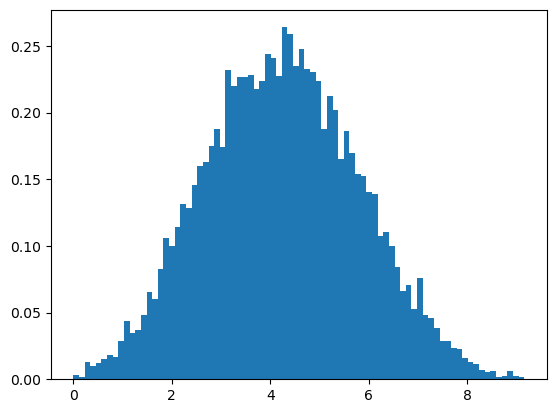

In [60]:
plt.hist(two_distr, bins=80, density=True)